In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
import numpy as np
import os

import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mnist_model.h5 to mnist_model (2).h5


In [3]:
print(os.listdir())

['.config', 'photo_1756042726.jpg', 'photo_1756044483.jpg', 'photo_1756044372.jpg', 'photo_1756044098.jpg', 'photo_1756044348.jpg', 'photo_1756042505.jpg', 'photo_1756044301.jpg', 'photo_1756042161.jpg', 'photo_1756044270.jpg', 'photo_1756044245.jpg', 'photo_1756044526.jpg', 'photo_1756042586.jpg', 'photo_1756043452.jpg', 'photo_1756042446.jpg', 'photo_1756042258.jpg', 'photo_1756043093.jpg', 'photo_1756042539.jpg', 'mnist_model.h5', 'photo_1756044411.jpg', 'photo_1756042604.jpg', 'photo_1756044321.jpg', 'mnist_model (1).h5', 'photo_1756041960.jpg', 'photo_1756043200.jpg', 'photo_1756042290.jpg', 'photo_1756042568.jpg', 'photo_1756044178.jpg', 'photo_1756044217.jpg', 'photo_1756042709.jpg', 'photo_1756044387.jpg', 'photo_1756044035.jpg', 'photo_1756041896.jpg', 'photo_1756043630.jpg', 'photo_1756044458.jpg', 'photo_1756042084.jpg', 'photo_1756043296.jpg', 'mnist_model (2).h5', 'photo_1756043342.jpg', 'photo_1756042001.jpg', 'photo_1756043501.jpg', 'photo_1756042685.jpg', 'photo_1756042

In [4]:
model = load_model("mnist_model.h5")

In [5]:
from IPython.display import Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📷 Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

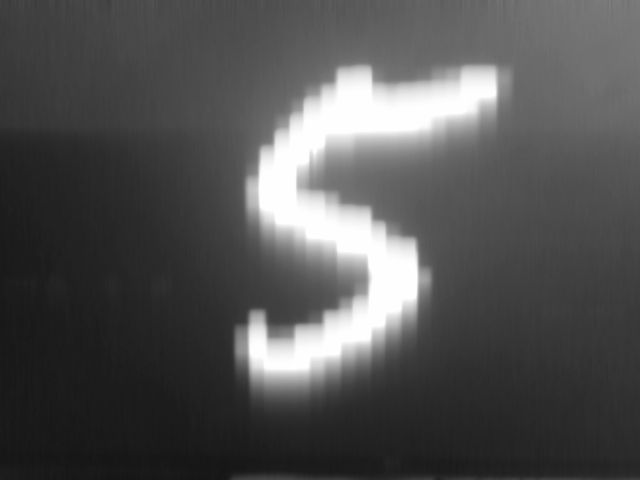

In [6]:
import time
filename = f"photo_{int(time.time())}.jpg"
take_photo(filename)
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

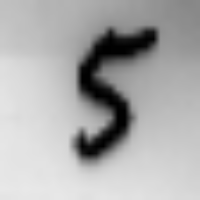

In [9]:
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = 255 - img
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

cv2_imshow(cv2.resize(img.reshape(28,28)*255, (200,200)))


In [10]:
img_for_model = img.reshape(1, 28*28)
prediction = np.argmax(model.predict(img_for_model))
print("Predicted Digit:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Digit: 5
